### 데이터 시각화 seaborn 타이타닉

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
plt.rcParams['figure.figsize'] = (5,4)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- 산점도 (seaborn으로 그리는게 좋음)

<Axes: xlabel='age', ylabel='fare'>

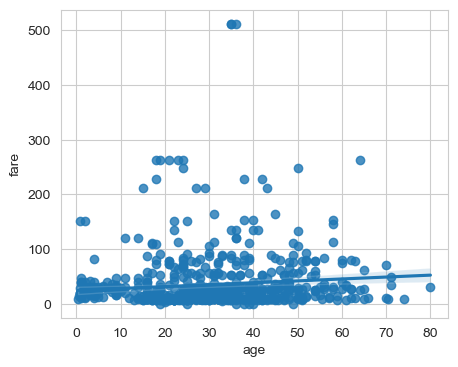

In [5]:
sns.set_style('whitegrid') # darkgrid, whitegrid, dark, white, ticks
sns.regplot(x='age', y='fare', data=titanic)

<Axes: xlabel='age', ylabel='fare'>

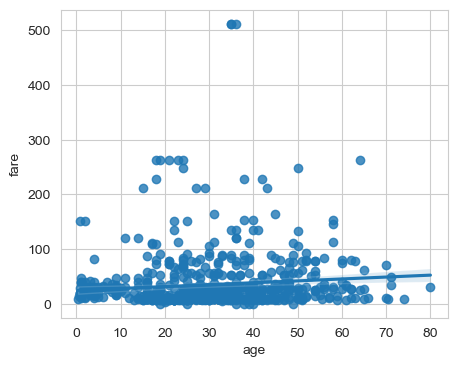

In [6]:
# 회귀선 숨김
sns.regplot(x='age', y='fare', data=titanic, fit_reg=True)
# 30-40대 분포도 높음

- barplot

<Axes: xlabel='who', ylabel='survived'>

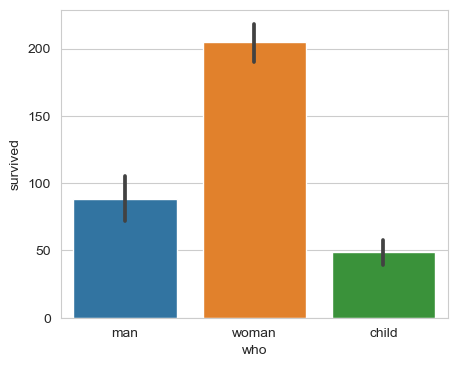

In [11]:
# titanic.groupby('who')['survived'].mean() # 해당과정 불필요
# 검정 막대기의 의미, '그래프에 그려진 수치 - 실제 값' 오차범위 (데이터가 적을수록 오차범위 넓게 잡힘)

sns.barplot(x='who', y='survived', data=titanic, estimator='sum') # estimator default: mean => 생존율

<Axes: xlabel='who', ylabel='survived'>

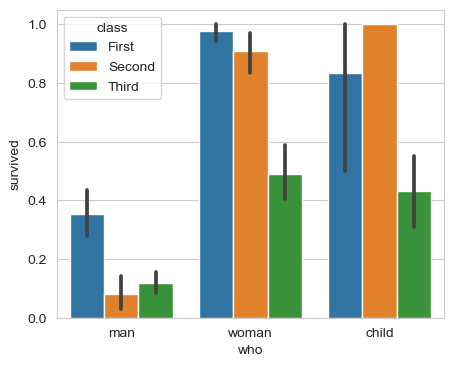

In [12]:
sns.barplot(x='who', y='survived', data=titanic, hue = 'class') # mean: 생존율

# child, Second는 왜 검정색 막대기(오차범위)가 없을까?: 표준편차가 0 이면 모든 값이 똑같다는 뜻인데 이 경우는 다 생존했음을 알 수 있다. 

<Axes: xlabel='who', ylabel='survived'>

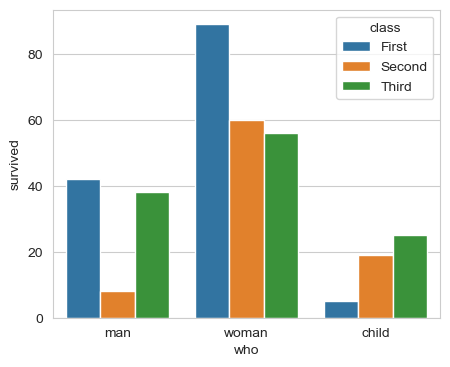

In [18]:
sns.barplot(x='who', y='survived', data=titanic, hue = 'class', estimator='sum', errorbar=None) # sum: 생존자 수

C:\Users\Playdata\AppData\Local\Temp\ipykernel_2132\3711026323.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


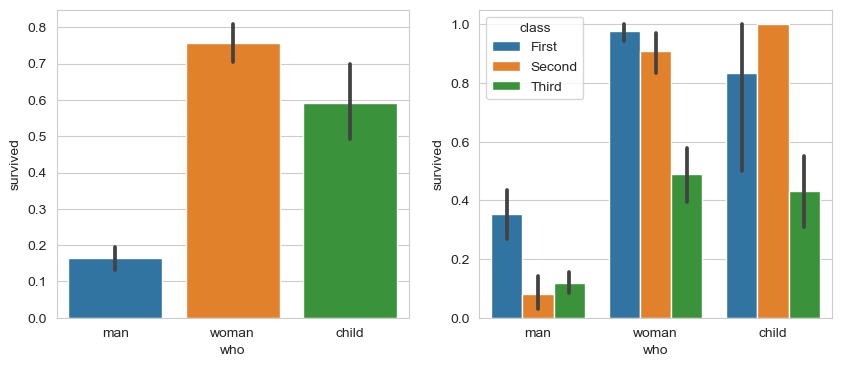

In [19]:
fig = plt.figure(figsize = (10,4))


ax1 = fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
sns.barplot(x='who', y='survived', data = titanic, ax = ax1)
sns.barplot(x='who', y='survived', hue='class', data = titanic, ax = ax2)

fig.show()

- countplot

<Axes: xlabel='class', ylabel='count'>

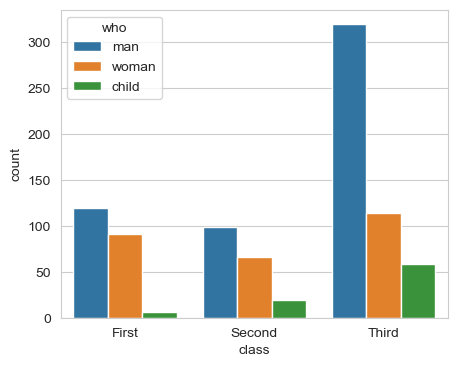

In [20]:
# class 별 탑승자 수 ('who'에 따라 분류)
sns.countplot(x='class', hue='who', data=titanic)

- boxplot

<Axes: xlabel='alive', ylabel='age'>

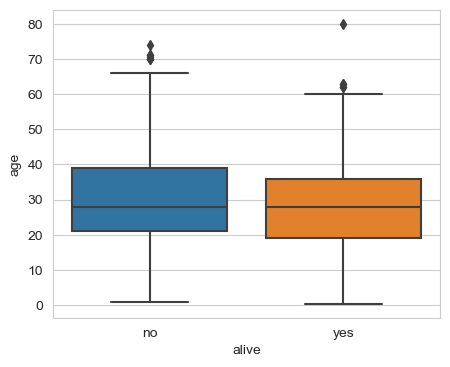

In [26]:
sns.boxplot(x='alive', y='age', data = titanic)

# 전반적으로 젊은 층이 많음 => 평균, 중앙값 중 평균이 더 크다

In [27]:
# 중앙값이 평균보다 작음
titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

<Axes: xlabel='alive', ylabel='age'>

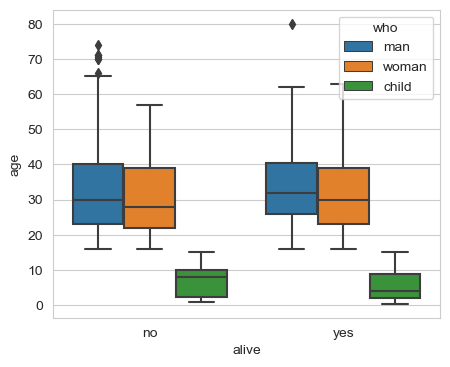

In [28]:
sns.boxplot(x='alive', y='age', hue = 'who', data = titanic)

- violinplot

<Axes: xlabel='alive', ylabel='age'>

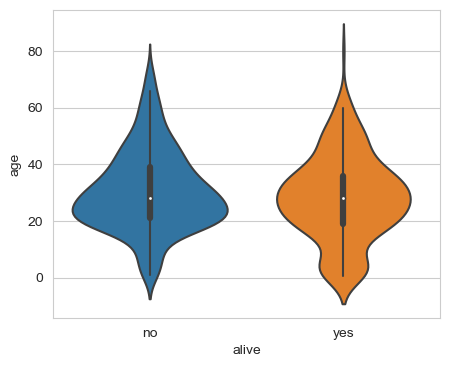

In [29]:
sns.violinplot(x='alive', y='age', data = titanic)

<Axes: xlabel='age', ylabel='alive'>

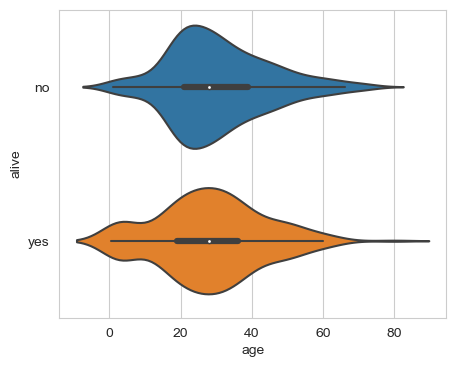

In [30]:
sns.violinplot(x='age', y='alive', data = titanic)

<Axes: xlabel='embark_town', ylabel='fare'>

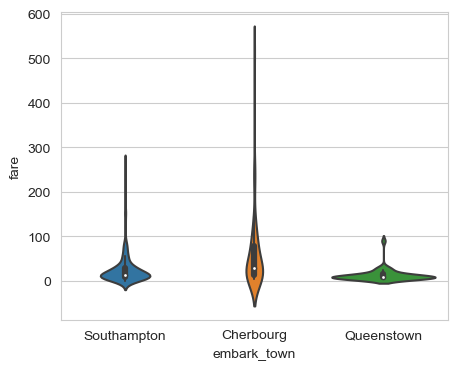

In [31]:
sns.violinplot(x='embark_town', y='fare', data = titanic)

<Axes: xlabel='embark_town', ylabel='count'>

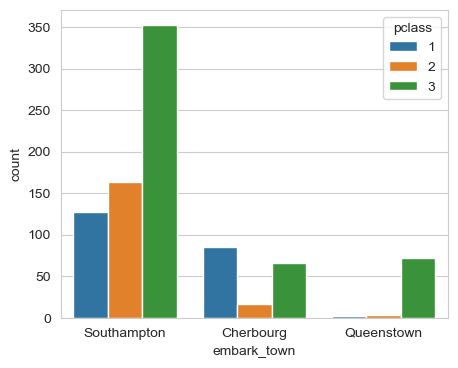

In [33]:
# 지역별 클래스 수
sns.countplot(x='embark_town', hue='pclass', data = titanic) # hue: 이중 분류

<Axes: xlabel='alive', ylabel='age'>

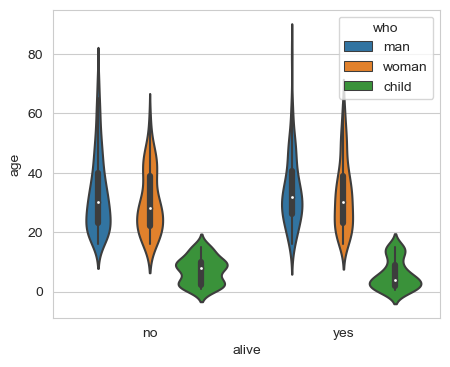

In [36]:
sns.violinplot(x='alive', y = 'age', hue='who', data = titanic)

- heatmap

In [38]:
who_pclass_size = titanic.pivot_table(index = 'who', columns = 'pclass', aggfunc = 'size') # count와 같지만 values를 넣지 않아도 됌
who_pclass_size

pclass,1,2,3
who,,,
child,6,19,58
man,119,99,319
woman,91,66,114


<Axes: xlabel='pclass', ylabel='who'>

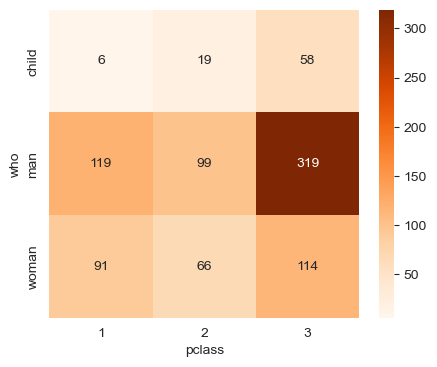

In [40]:
sns.heatmap(who_pclass_size, cmap='Oranges', annot=True, fmt='d') # annot: 각 셀의 값 표기 유무 
# fmt: 각 셀의 데이터 타입 설정

- pairplot

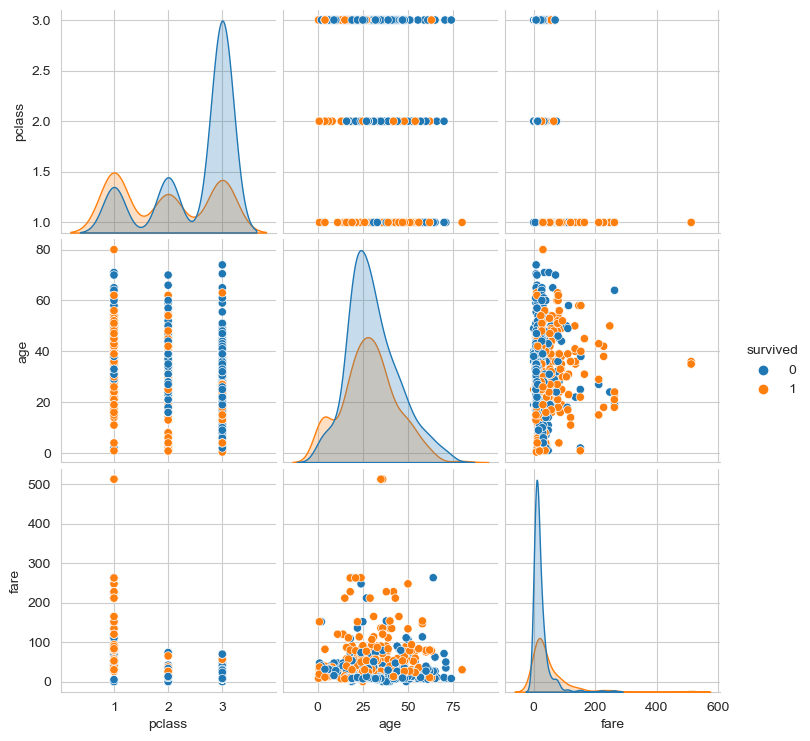

In [41]:
# 자기 자신의 위치에는 히스토그램
# 자신과 다른 컬럼은 Scatter plot
sns.pairplot(data=titanic[['survived','pclass','age','fare']], hue='survived', dropna=True)

---------------------------------------------

- 기타 예제: 3D 그래프

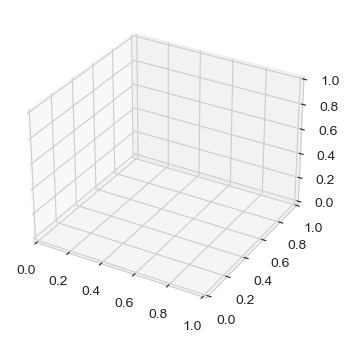

In [14]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

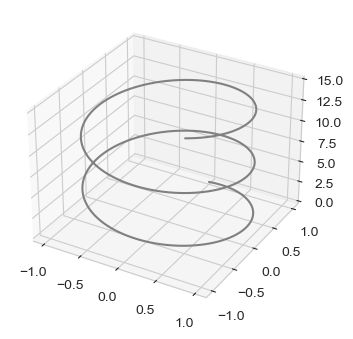

In [15]:
import numpy as np
ax = plt.axes(projection='3d')

z = np.linspace(0, 15, 1000)
x = np.sin(z)
y = np.cos(z)

ax.plot3D(x, y, z, 'gray')
plt.show()

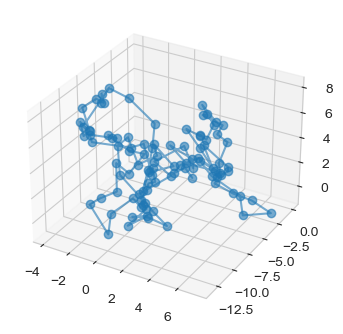

In [16]:
ax = plt.axes(projection='3d')

sample_size = 100
x = np.cumsum(np.random.normal(0, 1, sample_size))
y = np.cumsum(np.random.normal(0, 1, sample_size))
z = np.cumsum(np.random.normal(0, 1, sample_size))

ax.plot3D(x, y, z, alpha=0.6, marker='o')
plt.show()